# Plotting

There are many Python plotting libraries depending on your purpose. However, the standard general-purpose library is `matplotlib`. This is often used through its `pyplot` interface.

In [1]:
from matplotlib import pyplot
%matplotlib inline

The command `%matplotlib inline` is not a Python command, but an *IPython* command. When using the console, or the notebook, it makes the plots appear inline. You do not want to use this in a plain Python code.

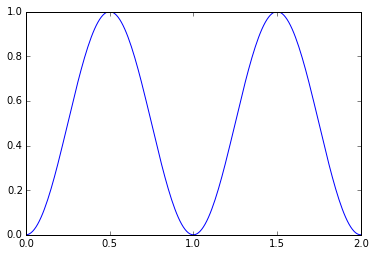

In [2]:
from math import sin, pi

x = []
y = []
for i in range(201):
    x_point = 0.01*i
    x.append(x_point)
    y.append(sin(pi*x_point)**2)

pyplot.plot(x, y)
pyplot.show()

We have defined two sequences - in this case lists, but tuples would also work. One contains the $x$-axis coordinates, the other the data points to appear on the $y$-axis. A basic plot is produced using the `plot` command of `pyplot`. However, this plot will not automatically appear on the screen, as after plotting the data you may wish to add additional information. Nothing will actually happen until you either save the figure to a file (using `pyplot.savefig(<filename>)`) or explicitly ask for it to be displayed (with the `show` command). When the plot is displayed the program will typically pause until you dismiss the plot.

This plotting interface is straightforward, but the results are not particularly nice. The following commands illustrate some of the ways of improving the plot:

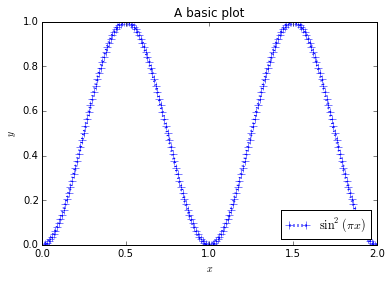

In [3]:
from math import sin, pi

x = []
y = []
for i in range(201):
    x_point = 0.01*i
    x.append(x_point)
    y.append(sin(pi*x_point)**2)

pyplot.plot(x, y, marker='+', markersize=8, linestyle=':', 
            linewidth=3, color='b', label=r'$\sin^2(\pi x)$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.show()

Whilst most of the commands are self-explanatory, a note should be made of the strings line `r'$x$'`. These strings are in LaTeX format, which is *the* standard typesetting method for professional-level mathematics. The `$` symbols surround mathematics. The `r` before the definition of the string is Python notation, not LaTeX. It says that the following string will be "raw": that backslash characters should be left alone. Then, special LaTeX commands have a backslash in front of them: here we use `\pi` and `\sin`. Most basic symbols can be easily guessed (eg `\theta` or `\int`), but there are [useful lists of symbols](http://www.artofproblemsolving.com/wiki/index.php/LaTeX:Symbols), and a [reverse search site](http://detexify.kirelabs.org/classify.html) available. We can also use `^` to denote superscripts (used here), `_` to denote subscripts, and use `{}` to group terms.

By combining these basic commands with other plotting types (`semilogx` and `loglog`, for example), most simple plots can be produced quickly.

Here are some more examples:

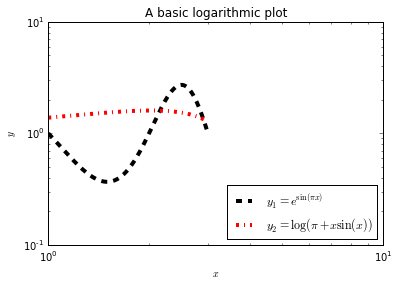

In [4]:
from math import sin, pi, exp, log

x = []
y1 = []
y2 = []
for i in range(201):
    x_point = 1.0 + 0.01*i
    x.append(x_point)
    y1.append(exp(sin(pi*x_point)))
    y2.append(log(pi+x_point*sin(x_point)))

pyplot.loglog(x, y1, linestyle='--', linewidth=4, 
              color='k', label=r'$y_1=e^{\sin(\pi x)}$')
pyplot.loglog(x, y2, linestyle='-.', linewidth=4, 
              color='r', label=r'$y_2=\log(\pi+x\sin(x))$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic logarithmic plot')
pyplot.show()

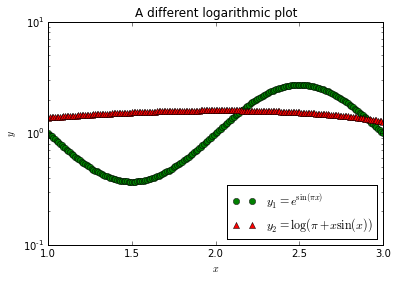

In [5]:
from math import sin, pi, exp, log

x = []
y1 = []
y2 = []
for i in range(201):
    x_point = 1.0 + 0.01*i
    x.append(x_point)
    y1.append(exp(sin(pi*x_point)))
    y2.append(log(pi+x_point*sin(x_point)))

pyplot.semilogy(x, y1, linestyle='None', marker='o', 
              color='g', label=r'$y_1=e^{\sin(\pi x)}$')
pyplot.semilogy(x, y2, linestyle='None', marker='^', 
              color='r', label=r'$y_2=\log(\pi+x\sin(x))$')
pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A different logarithmic plot')
pyplot.show()

We will look at more complex plots later, but the [matplotlib documentation](http://matplotlib.org/api/pyplot_summary.html) contains a lot of details, and the [gallery](http://matplotlib.org/gallery.html) contains a lot of examples that can be adapted to fit. There is also an [extremely useful document](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) as part of [Johansson's lectures on scientific Python](https://github.com/jrjohansson/scientific-python-lectures).

# Exercise: Logistic map

The logistic map builds a sequence of numbers $\{ x_n \}$ using the relation

\begin{equation}
  x_{n+1} = r x_n \left( 1 - x_n \right),
\end{equation}

where $0 \le x_0 \le 1$.

## Exercise 1

Write a program that calculates the first $N$ members of the sequence, given as input $x_0$ and $r$ (and, of course, $N$).

## Exercise 2

Fix $x_0=0.5$. Calculate the first 2,000 members of the sequence for $r=1.5$ and $r=3.5$. Plot the last 100 members of the sequence in both cases.

What does this suggest about the long-term behaviour of the sequence?

## Exercise 3

Fix $x_0 = 0.5$. For each value of $r$ between $1$ and $4$, in steps of $0.01$, calculate the first 2,000 members of the sequence. Plot the last 1,000 members of the sequence on a plot where the $x$-axis is the value of $r$ and the $y$-axis is the values in the sequence. Do not plot lines - just plot markers (e.g., use the `'k.'` plotting style).

## Exercise 4

For iterative maps such as the logistic map, one of three things can occur:

1. The sequence settles down to a *fixed point*.
2. The sequence rotates through a finite number of values. This is called a *limit cycle*.
3. The sequence generates an infinite number of values. This is called *deterministic chaos*.

Using just your plot, or new plots from this data, work out approximate values of $r$ for which there is a transition from fixed points to limit cycles, from limit cycles of a given number of values to more values, and the transition to chaos.

# Exercise: Mandelbrot

The Mandelbrot set is also generated from a sequence, $\{ z_n \}$, using the relation

\begin{equation}
  z_{n+1} = z_n^2 + c, \qquad z_0 = 0.
\end{equation}

The members of the sequence, and the constant $c$, are all complex. The point in the complex plane at $c$ is in the Mandelbrot set only if the $|z_n| < 2$ for all members of the sequence. In reality, checking the first 100 iterations is sufficient.

**Note**: the Python notation for a complex number $x + \text{i} y$ is `x + yj`: that is, `j` is used to indicate $\sqrt{-1}$. If you know the values of `x` and `y` then `x + yj` constructs a complex number; if they are stored in variables you can use `complex(x, y)`.

## Exercise 1

Write a function that checks if the point $c$ is in the Mandelbrot set.

## Exercise 2

Check the points $c=0$ and $c=\pm 2 \pm 2 \text{i}$ and ensure they do what you expect. (What *should* you expect?)

## Exercise 3

Write a function that, given $N$

1. generates an $N \times N$ grid spanning $c = x + \text{i} y$, for $-2 \le x \le 2$ and $-2 \le y \le 2$;
2. returns an $N\times N$ array containing one if the associated grid point is in the Mandelbrot set, and zero otherwise.

## Exercise 4

Using the function `imshow` from `matplotlib`, plot the resulting array for a $100 \times 100$ array to make sure you see the expected shape.

## Exercise 5

Modify your functions so that, instead of returning whether a point is inside the set or not, it returns the logarithm of the number of iterations it takes. Plot the result using `imshow` again.

## Exercise 6

Try some higher resolution plots, and try plotting only a section to see the structure. **Note** this is not a good way to get high accuracy close up images!